In [ ]:
#Gumbel 분포를 제안분포로, 정규분포를 목표분포로 한 M-H 알고리즘 구현

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def p(x):
  return 1/np.sqrt(2*np.pi) * np.exp(-(x**2)/2)

def q(x,m,s=0.5):
  return 1/s * np.exp(-(x-m)/s) * np.exp( -np.exp(-(x-m)/s) )

# p(x)와 q(x)를 이용하여 alpha함수를 만들었다.
# alpha함수는 기존변수 x와 gumbel에서 뽑은 새로운 변수 x_star를 이용하여 새로운 변수 x_star를 받아들지, 않을지에 대한 확률을 반환한다.
def alpha(x,x_star):
  v = (p(x_star)*q(x,x_star))/(p(x)*q(x_star,x))
  return  min(1, v)

In [ ]:
# def T(x,x_star):
#   return q(x_star,x)*alpha(x,x_star)

In [4]:
x,s=5,0.5
x_list=[x]

for i in range(100000):
  x_star = np.random.gumbel(x,s)

  if np.random.uniform() < alpha(x,x_star):
    pass#accept
  else:
    x_star=x

  x_list.append(x_star)
  x=x_star

(array([1.000e+00, 0.000e+00, 4.000e+00, 5.000e+00, 2.000e+00, 9.000e+00,
        1.400e+01, 1.200e+01, 1.700e+01, 2.500e+01, 3.000e+01, 2.000e+01,
        5.400e+01, 6.200e+01, 7.300e+01, 8.000e+01, 1.020e+02, 1.310e+02,
        2.010e+02, 2.530e+02, 2.870e+02, 3.150e+02, 3.950e+02, 5.430e+02,
        6.260e+02, 6.830e+02, 9.140e+02, 1.001e+03, 1.129e+03, 1.257e+03,
        1.458e+03, 1.604e+03, 1.815e+03, 2.139e+03, 2.299e+03, 2.446e+03,
        2.573e+03, 2.693e+03, 2.976e+03, 3.147e+03, 3.161e+03, 3.483e+03,
        3.593e+03, 3.554e+03, 3.447e+03, 3.620e+03, 3.571e+03, 3.531e+03,
        3.499e+03, 3.168e+03, 3.152e+03, 3.015e+03, 3.013e+03, 2.743e+03,
        2.633e+03, 2.397e+03, 2.087e+03, 1.953e+03, 1.799e+03, 1.614e+03,
        1.449e+03, 1.249e+03, 1.055e+03, 1.138e+03, 8.280e+02, 7.190e+02,
        6.420e+02, 4.760e+02, 3.790e+02, 3.300e+02, 2.680e+02, 2.080e+02,
        1.930e+02, 1.430e+02, 1.160e+02, 8.900e+01, 7.800e+01, 6.000e+01,
        4.700e+01, 3.100e+01, 1.100e+0

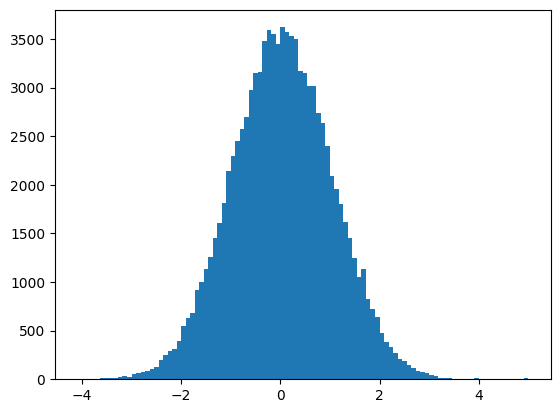

In [5]:
plt.hist(x_list,bins=100)

In [ ]:
#임의의 함수(Gumbel)를 확률함수로 설정하여 정규분포를 만들었다.